Nama: Muhammad Ashlah Afifi

NIM: 1103210216

Kelas: TK-45-G44

Step 1: Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Generate or load the data

In [2]:
# Generate synthetic data
np.random.seed(42)
num_samples = 1000

# Features: square footage, number of bedrooms, age of the house, etc.
square_footage = np.random.normal(1500, 500, num_samples)
num_bedrooms = np.random.randint(1, 6, num_samples)
age_of_house = np.random.randint(0, 50, num_samples)
house_prices = 50000 + 150 * square_footage + 25000 * num_bedrooms - 200 * age_of_house + np.random.normal(0, 10000, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'square_footage': square_footage,
    'num_bedrooms': num_bedrooms,
    'age_of_house': age_of_house,
    'house_prices': house_prices
})

# Separate features and target
features = data[['square_footage', 'num_bedrooms', 'age_of_house']]
target = data['house_prices']


Step 3: Preprocess the data

In [3]:
# Split the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


Step 4: Build the neural network model

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_features.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output layer with 1 neuron for regression
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()


Step 5: Train the model

Epoch 1/100
40/40 [==============================] - 3s 32ms/step - loss: 126646534144.0000 - mae: 346350.5938 - val_loss: 130943049728.0000 - val_mae: 352584.2500
Epoch 2/100
40/40 [==============================] - 0s 12ms/step - loss: 126642536448.0000 - mae: 346344.8438 - val_loss: 130937282560.0000 - val_mae: 352576.0625
Epoch 3/100
40/40 [==============================] - 0s 11ms/step - loss: 126635327488.0000 - mae: 346334.6562 - val_loss: 130927558656.0000 - val_mae: 352562.5000
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 126623916032.0000 - mae: 346318.5000 - val_loss: 130912829440.0000 - val_mae: 352542.0000
Epoch 5/100
40/40 [==============================] - 1s 16ms/step - loss: 126607663104.0000 - mae: 346295.7500 - val_loss: 130892824576.0000 - val_mae: 352514.3125
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 126585749504.0000 - mae: 346265.1875 - val_loss: 130866266112.0000 - val_mae: 352477.6875
Epoch 7/100
40/4

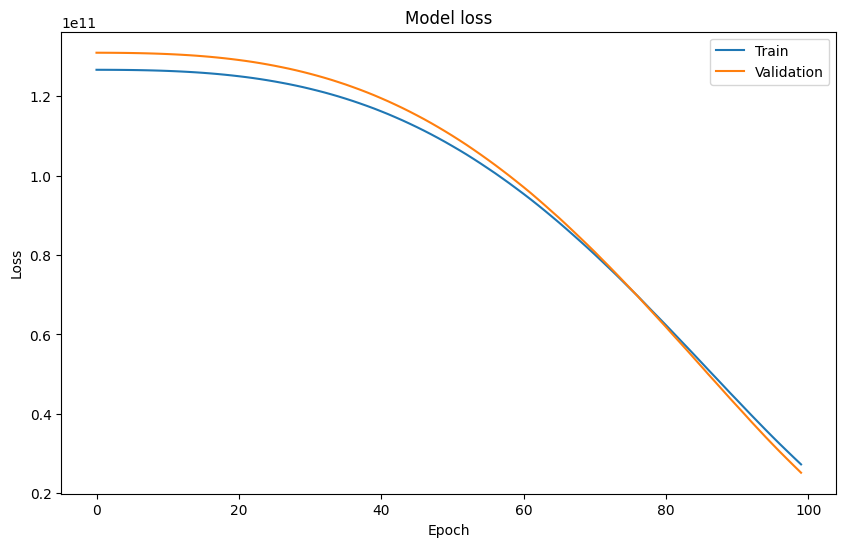

In [5]:
history = model.fit(train_features, train_target,
                    epochs=100, batch_size=16,
                    validation_split=0.2, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Step 6: Evaluate the model

In [6]:
test_mse_score, test_mae_score = model.evaluate(test_features, test_target)
print(f"Test MSE: {test_mse_score}")
print(f"Test MAE: {test_mae_score}")


7/7 [==============================] - 0s 2ms/step - loss: 25674579968.0000 - mae: 158010.0156
Test MSE: 25674579968.0
Test MAE: 158010.015625
